# Insurance 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Uploading the data**

In [2]:
insdf =pd.read_csv('DS2_C6_S5_Insurance_Data_Challenge.csv')

In [3]:
insdf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insdf.shape

(1338, 7)

In [5]:
insdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insdf.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# no null values

In [8]:
insdf.duplicated().sum()

1

In [9]:
insdf.drop_duplicates(keep='first',inplace=True)

In [10]:
insdf.duplicated().sum()

0

In [11]:
insdf['ageCat']=pd.cut(insdf.age,bins=3,labels=["Young","Middle","Old"])

In [12]:
insdf

,age,sex,bmi,children,smoker,region,charges,ageCat
0,19,female,27.900,0,yes,southwest,16884.92400,Young
1,18,male,33.770,1,no,southeast,1725.55230,Young
2,28,male,33.000,3,no,southeast,4449.46200,Young
3,33,male,22.705,0,no,northwest,21984.47061,Young
4,32,male,28.880,0,no,northwest,3866.85520,Young
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Old
1334,18,female,31.920,0,no,northeast,2205.98080,Young
1335,18,female,36.850,0,no,southeast,1629.83350,Young
1336,21,female,25.800,0,no,southwest,2007.94500,Young


In [13]:
# no duplicates

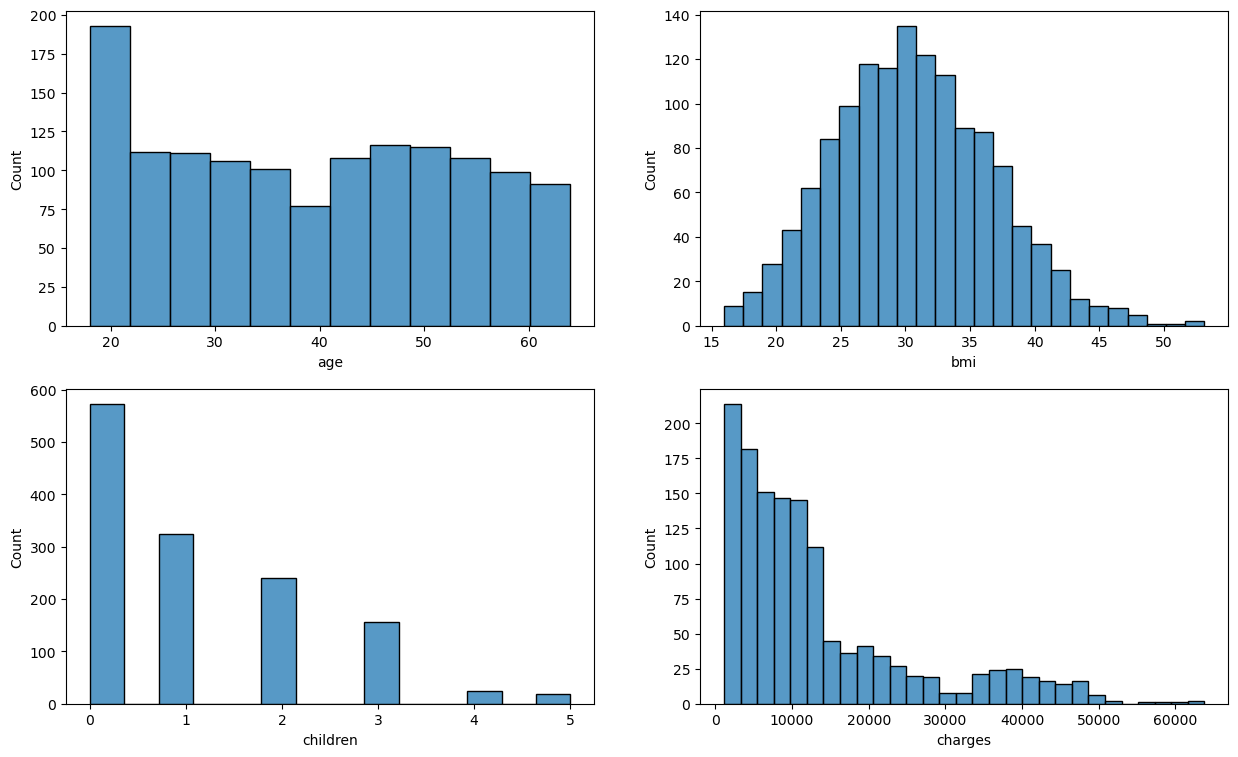

In [14]:
num_col = insdf.select_dtypes(["float64","int64"])

fig,axs=plt.subplots(2,2,figsize=(15,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=insdf,ax=axs[count])
    count+=1  

<AxesSubplot:xlabel='age'>

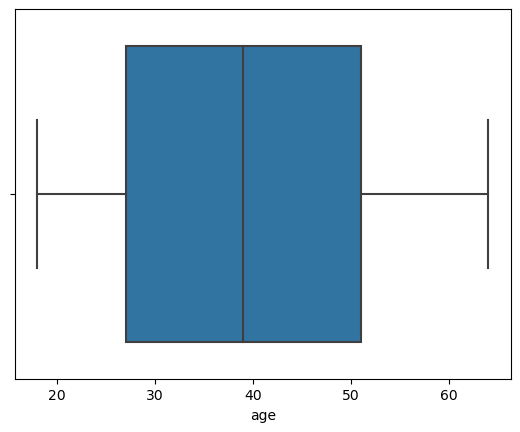

In [15]:
sns.boxplot('age',data=insdf)

<AxesSubplot:xlabel='bmi'>

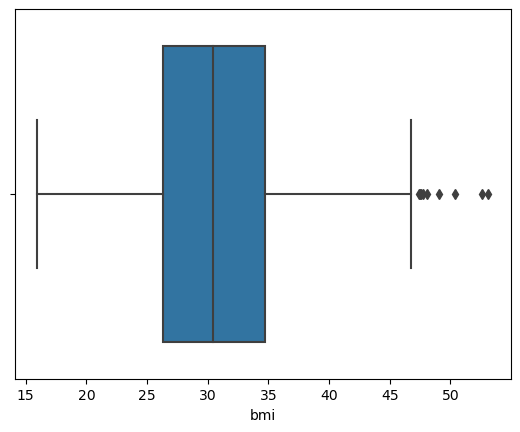

In [16]:
sns.boxplot('bmi',data=insdf)

In [17]:
iqr=insdf['bmi'].quantile(0.75)-insdf['bmi'].quantile(0.25)
lf=insdf['bmi'].quantile(0.25)-1.5*iqr
uf=insdf['bmi'].quantile(0.75)+1.5*iqr
insdf=insdf[(insdf['bmi']>lf) & (insdf['bmi']<uf)] 

<AxesSubplot:xlabel='bmi'>

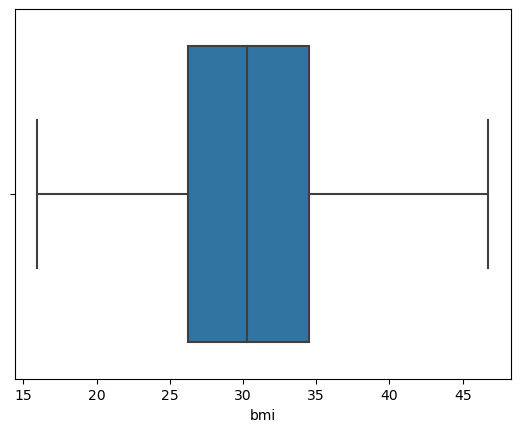

In [18]:
sns.boxplot('bmi',data=insdf)

<AxesSubplot:xlabel='charges'>

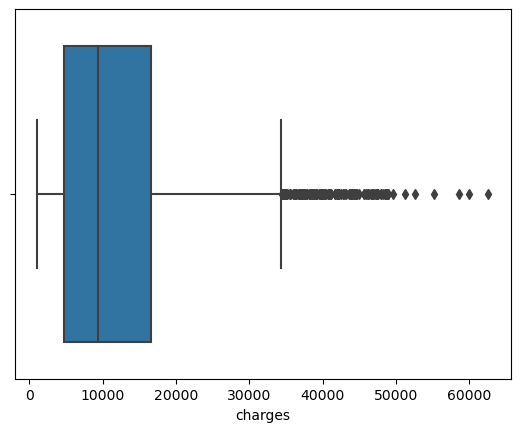

In [19]:
sns.boxplot('charges',data=insdf)

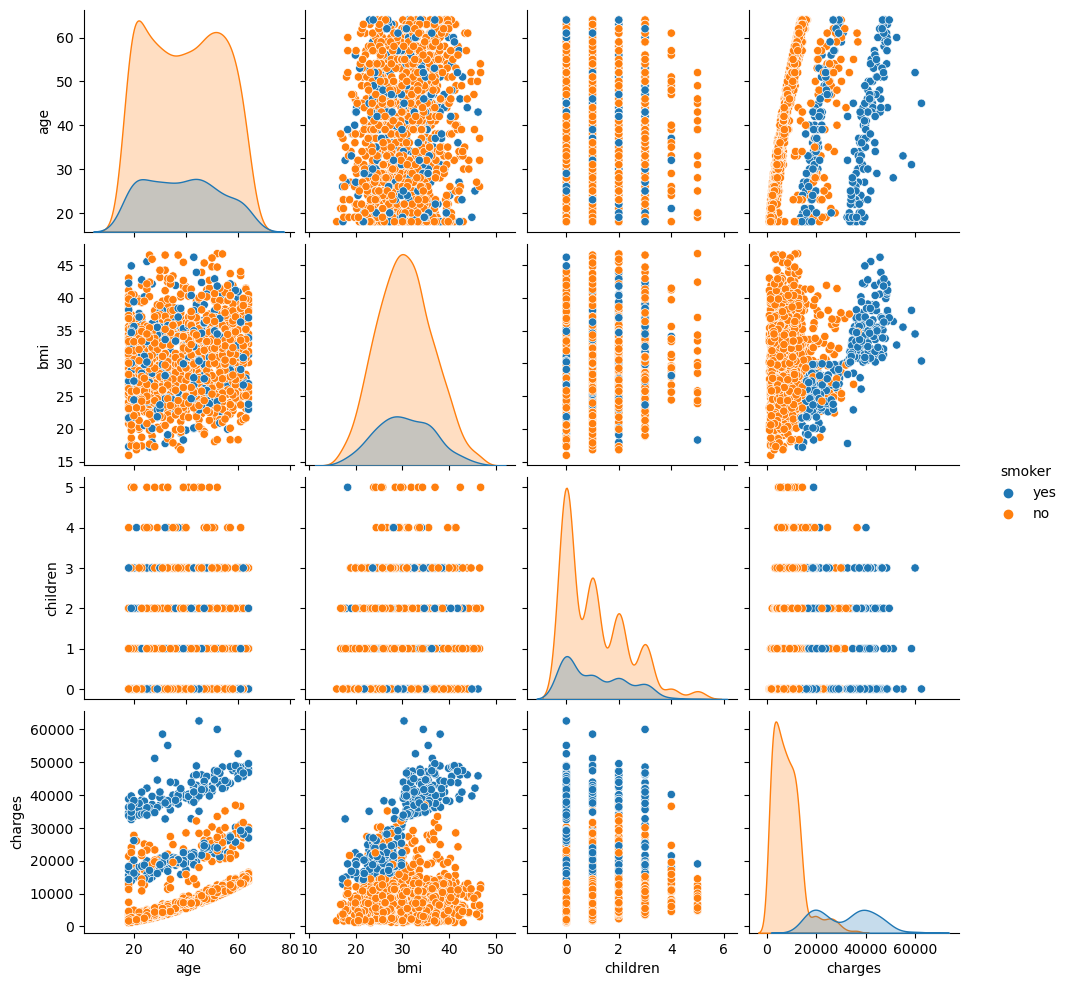

In [20]:
sns.pairplot(insdf,hue='smoker')

In [21]:
# most of the people of age greater than 30 are non smokers
# Most of the people with bmi above 25 are non smokers
# Most of the people with more than 1 child are non smokers


<AxesSubplot:xlabel='region', ylabel='charges'>

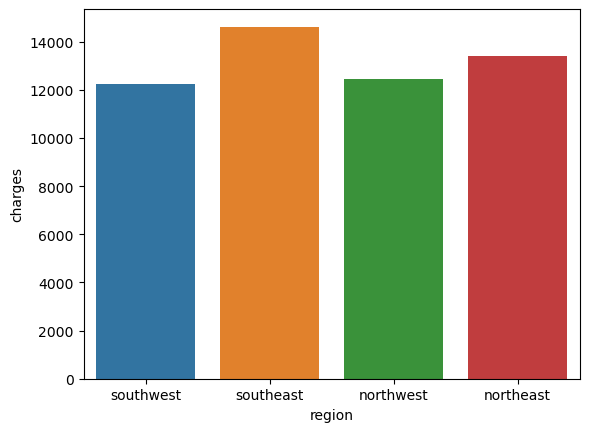

In [22]:
sns.barplot(y='charges',x='region',data=insdf,ci=None)

In [23]:
# southeast region charges more than other regions

<AxesSubplot:xlabel='sex', ylabel='charges'>

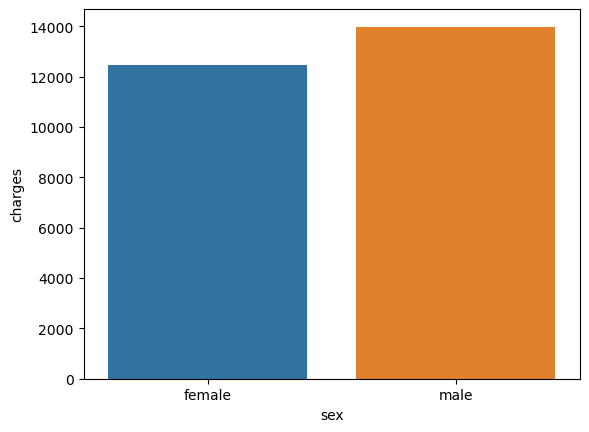

In [24]:
sns.barplot(y='charges',x='sex',data=insdf,ci=None)

In [25]:
# male have more charges than the Females

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# changing object to category

In [28]:
for i in insdf.columns:
    insdf[i]=LabelEncoder().fit_transform(insdf[i])
insdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1328 non-null   int64
 1   sex       1328 non-null   int32
 2   bmi       1328 non-null   int64
 3   children  1328 non-null   int64
 4   smoker    1328 non-null   int32
 5   region    1328 non-null   int32
 6   charges   1328 non-null   int64
 7   ageCat    1328 non-null   int32
dtypes: int32(4), int64(4)
memory usage: 104.9 KB


In [29]:
# scalling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale_df=pd.DataFrame(StandardScaler().fit_transform(insdf),columns=insdf.columns)
scale_df

,age,sex,bmi,children,smoker,region,charges,ageCat
0,-1.440429,-1.007559,-0.493804,-0.908563,1.974935,1.343447,0.875155,1.100593
1,-1.511669,0.992498,0.630565,-0.080442,-0.506346,0.439649,-1.584670,1.100593
2,-0.799261,0.992498,0.490937,1.575799,-0.506346,0.439649,-0.937760,1.100593
3,-0.443056,0.992498,-1.405057,-0.908563,-0.506346,-0.464149,1.115138,1.100593
4,-0.514297,0.992498,-0.302735,-0.908563,-0.506346,-0.464149,-1.073402,1.100593
...,...,...,...,...,...,...,...,...
1323,0.768039,0.992498,0.086753,1.575799,-0.506346,-0.464149,0.202160,-0.109330
1324,-1.511669,-1.007559,0.277822,-0.908563,-0.506346,-1.367947,-1.425551,1.100593
1325,-1.511669,-1.007559,1.159679,-0.908563,-0.506346,0.439649,-1.649883,1.100593
1326,-1.297947,-1.007559,-0.868593,-0.908563,-0.506346,1.343447,-1.495981,1.100593


<AxesSubplot:>

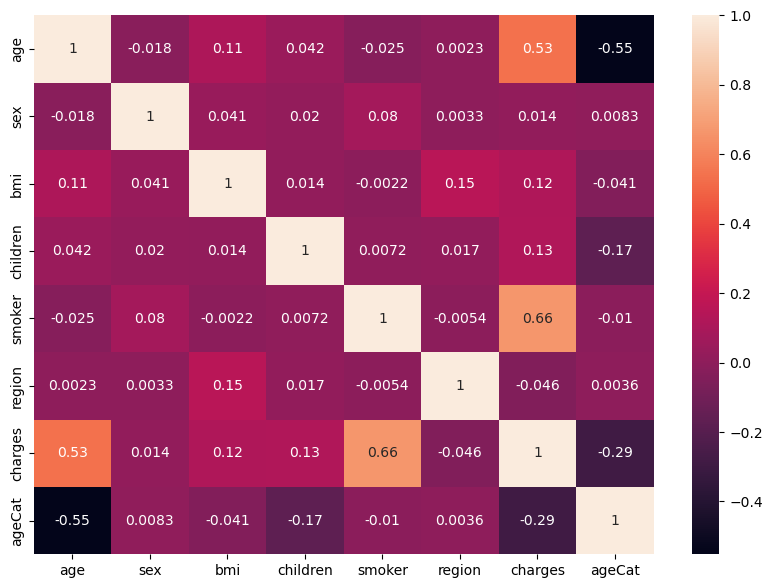

In [32]:
corr_mat=scale_df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_mat,annot=True)

In [33]:
scale_df.drop('ageCat',axis=1,inplace=True)

In [34]:
scale_df

,age,sex,bmi,children,smoker,region,charges
0,-1.440429,-1.007559,-0.493804,-0.908563,1.974935,1.343447,0.875155
1,-1.511669,0.992498,0.630565,-0.080442,-0.506346,0.439649,-1.584670
2,-0.799261,0.992498,0.490937,1.575799,-0.506346,0.439649,-0.937760
3,-0.443056,0.992498,-1.405057,-0.908563,-0.506346,-0.464149,1.115138
4,-0.514297,0.992498,-0.302735,-0.908563,-0.506346,-0.464149,-1.073402
...,...,...,...,...,...,...,...
1323,0.768039,0.992498,0.086753,1.575799,-0.506346,-0.464149,0.202160
1324,-1.511669,-1.007559,0.277822,-0.908563,-0.506346,-1.367947,-1.425551
1325,-1.511669,-1.007559,1.159679,-0.908563,-0.506346,0.439649,-1.649883
1326,-1.297947,-1.007559,-0.868593,-0.908563,-0.506346,1.343447,-1.495981


# PCA

In [35]:
pca=PCA()
pca.fit(scale_df)
features=range(pca.n_components_)
transformed_data=pca.transform(scale_df)

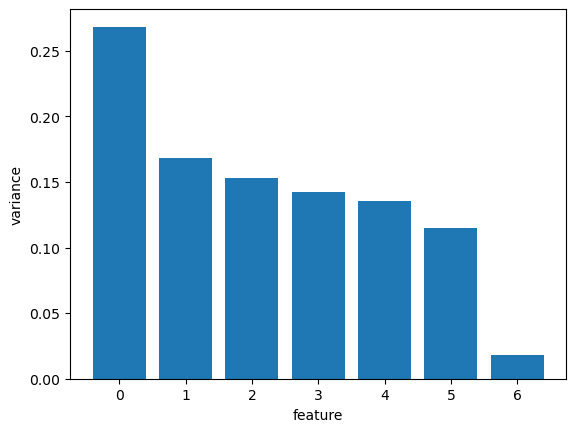

In [36]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel('feature')
plt.ylabel('variance')
plt.show()

In [37]:
pca2=PCA(n_components=2)
transform_data2=pca2.fit_transform(scale_df)
transform_data2.shape

(1328, 2)

Text(0, 0.5, 'pca2')

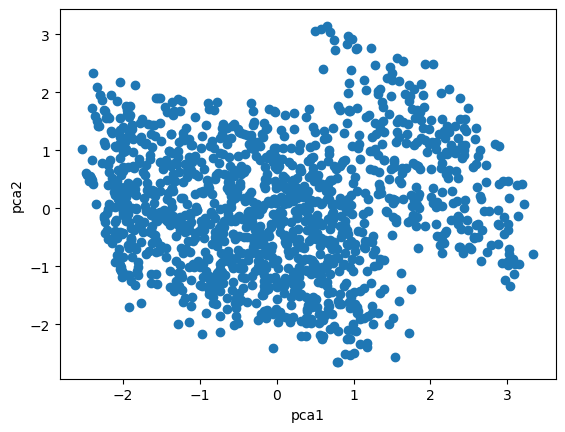

In [38]:
plt.scatter(transform_data2[:,0],transform_data2[:,1])
plt.xlabel('pca1')
plt.ylabel('pca2')

**LDA**

In [39]:
y=insdf.ageCat

In [40]:
y=pd.DataFrame(y)
y

,ageCat
0,2
1,2
2,2
3,2
4,2
...,...
1333,1
1334,2
1335,2
1336,2


In [41]:
lda=LinearDiscriminantAnalysis()
lda.fit_transform(scale_df,y)
# features=range(lda.n_components_)
# transformed_data=lda.transform(scaller_df,y)

array([[-4.41107306, -0.81468614],
       [-4.5742106 ,  0.09379169],
       [-2.46534254,  1.51284661],
       ...,
       [-4.5674605 , -0.60522439],
       [-3.91163527, -0.55707154],
       [ 4.60490905,  0.28846623]])

In [42]:
# plt.bar(features,pca.explained_variance_ratio_)
# plt.xlabel('feature')
# plt.ylabel('variance')
# plt.show()

# KMean

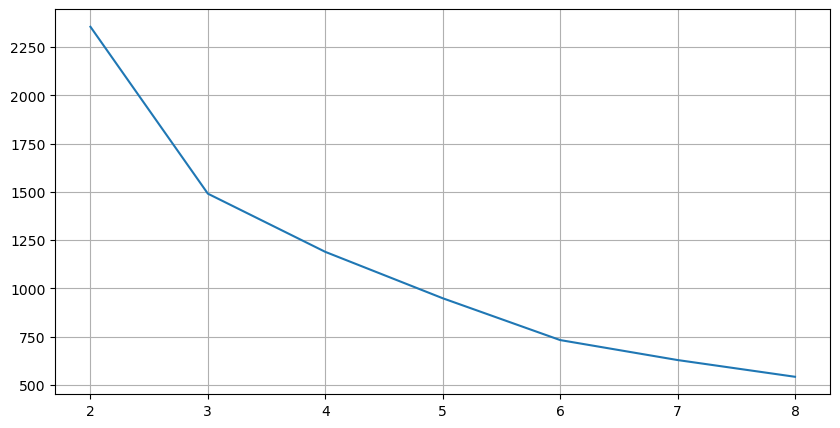

In [43]:
distortion=[]
for i in range(2,9):
    model=KMeans(n_clusters=i).fit(transform_data2)
    distortion.append(model.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(2,9),distortion)
plt.grid()
plt.show()

In [44]:
for i in range(2,9):
    model=KMeans(n_clusters=i).fit(transform_data2)
    score=silhouette_score(transform_data2,model.labels_,metric='euclidean')
    print(f'k = {i}, score = {score}')

k = 2, score = 0.3667633047638338
k = 3, score = 0.3908949597511382
k = 4, score = 0.3727542503007707
k = 5, score = 0.3639905896612772
k = 6, score = 0.38329145153327693
k = 7, score = 0.37078813242438535
k = 8, score = 0.3733578283912761


Text(0, 0.5, 'pca2')

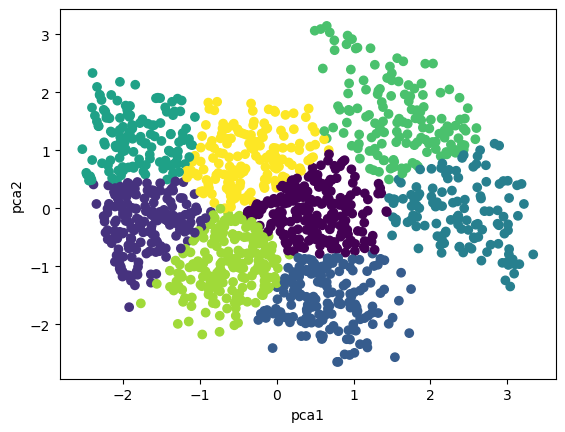

In [45]:
plt.scatter(transform_data2[:,0],transform_data2[:,1],c=model.labels_)
plt.xlabel('pca1')
plt.ylabel('pca2')

# Hierarchical Clustering

In [65]:
from scipy.cluster.hierarchy import dendrogram,linkage

Text(0, 0.5, 'Euclidean distance')

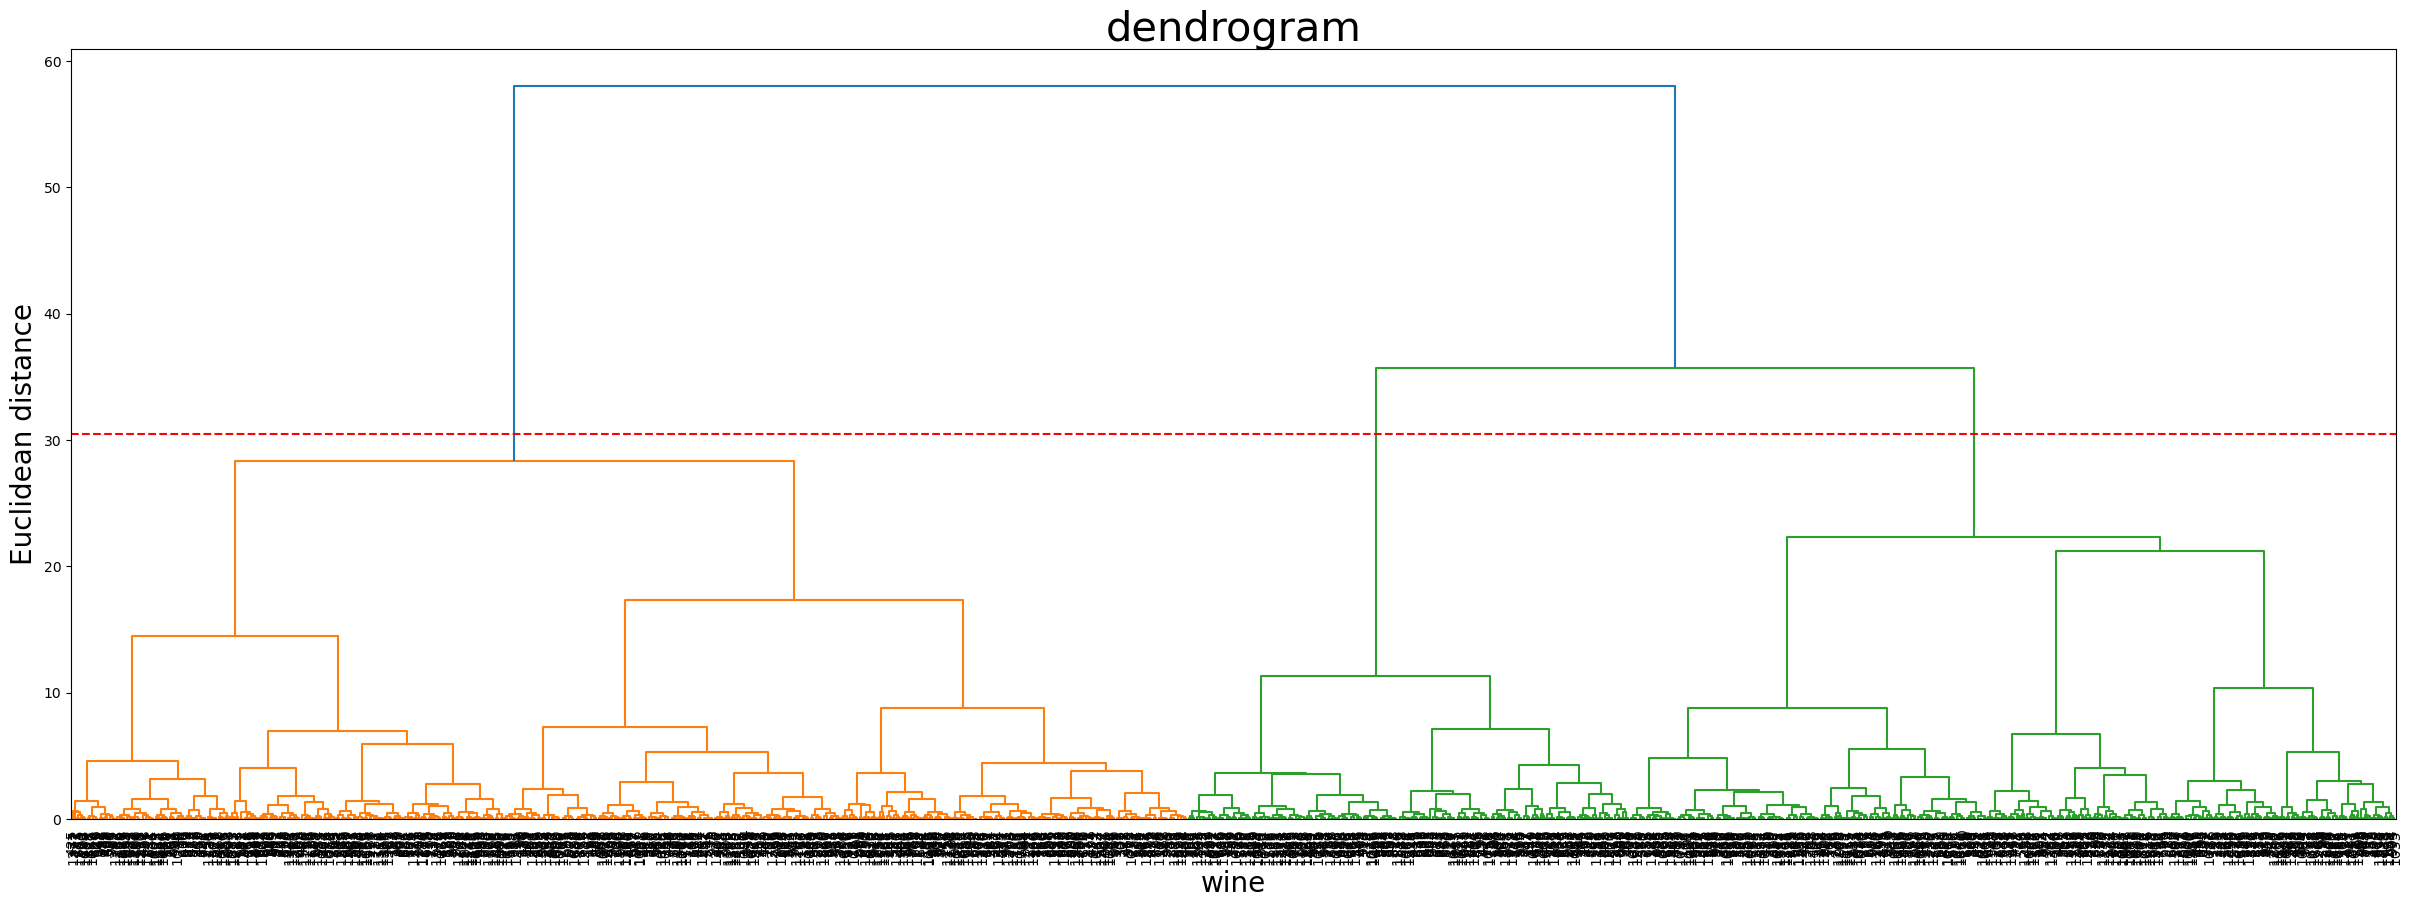

In [55]:
# dendogram
plt.figure(figsize=(30,10))
dendrogram = dendrogram(linkage(transform_data2,method='ward',metric='euclidean'))
plt.axhline(y=30.5,color='r',linestyle ='--')
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=10)
plt.title('dendrogram',fontsize=30)
plt.xlabel('wine',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)

In [56]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [60]:
for i in range(2,15):
    amodel=AgglomerativeClustering(n_clusters=i).fit(transform_data2)
    amodel.fit_predict(transform_data2)
    score=silhouette_score(transform_data2,amodel.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 2 score 0.3602654653123305
k: 3 score 0.3241804892351046
k: 4 score 0.3092667096149103
k: 5 score 0.29910881557555297
k: 6 score 0.3329842744325631
k: 7 score 0.3261143631407197
k: 8 score 0.34108369648078585
k: 9 score 0.32952988068325484
k: 10 score 0.3221488836754331
k: 11 score 0.3170842749261678
k: 12 score 0.315027330236729
k: 13 score 0.3076055322850927
k: 14 score 0.3049569771280694


In [61]:
y_hc = hc.fit_predict(transform_data2)

In [62]:
y_hc

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

Text(0.5, 1.0, 'Agglomerative')

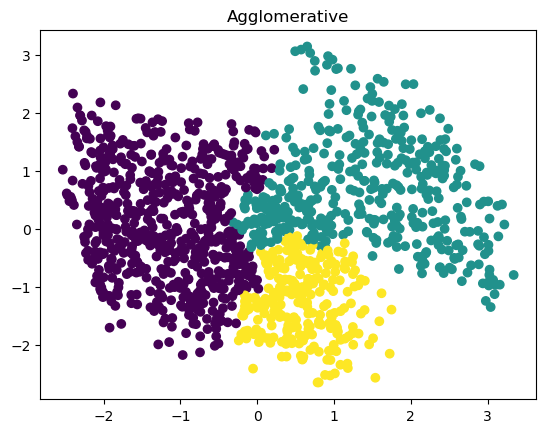

In [63]:
plt.scatter(transform_data2[:,0],transform_data2[:,1],c=y_hc)
plt.title('Agglomerative')

# DBSCAN

In [73]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [74]:
neighbours=NearestNeighbors(n_neighbors=5)
neigh_fit = neighbours.fit(transform_data2)
distance, index=neigh_fit.kneighbors(transform_data2)

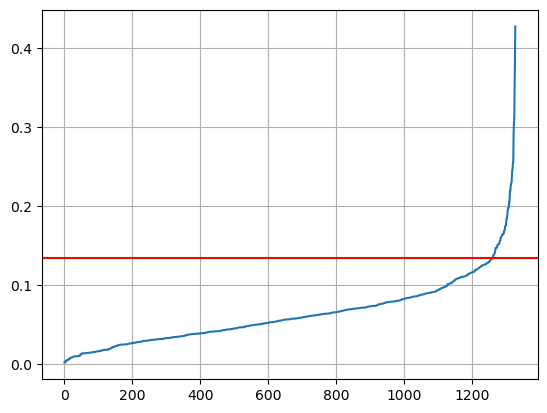

In [75]:
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=0.135,color='r')
plt.grid()
plt.show()

In [78]:
eps=0.135
for i in range(2,15):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(transform_data2)
    labels=db.labels_
    
    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print('min_sample:',i,'cluster:',cluster)
#     score=silhouette_score(transform_data2,new_labels,metric='euclidean')
#     print(f'score = {score}')
#     print(' ')

min_sample: 2 cluster: [(1, 66), (2, 859), (3, 2), (4, 3), (5, 21), (6, 22), (7, 7), (8, 7), (9, 4), (10, 10), (11, 10), (12, 6), (13, 8), (14, 5), (15, 5), (16, 4), (17, 4), (18, 2), (19, 5), (20, 21), (21, 14), (22, 17), (23, 3), (24, 6), (25, 3), (26, 2), (27, 9), (28, 2), (29, 4), (30, 6), (31, 5), (32, 3), (33, 3), (34, 10), (35, 5), (36, 16), (37, 4), (38, 2), (39, 5), (40, 4), (41, 8), (42, 3), (43, 3), (44, 2), (45, 7), (46, 4), (47, 2), (48, 3), (49, 3), (50, 2), (51, 2), (52, 2), (53, 11), (54, 2), (55, 2), (56, 2), (57, 3), (58, 3), (59, 2), (60, 2), (61, 2), (62, 2), (63, 2), (64, 3), (65, 3), (66, 2), (67, 2), (68, 3), (69, 4), (70, 2), (71, 5), (72, 2), (73, 4), (74, 2), (75, 2), (76, 3), (77, 2), (78, 2), (79, 2), (80, 2), (81, 2), (82, 3), (83, 2), (84, 3), (85, 2), (86, 3)]
min_sample: 3 cluster: [(1, 128), (2, 859), (3, 21), (4, 22), (5, 7), (6, 4), (7, 7), (8, 10), (9, 10), (10, 6), (11, 8), (12, 5), (13, 5), (14, 4), (15, 5), (16, 21), (17, 14), (18, 3), (19, 6), (2

In [80]:
db=DBSCAN(eps=eps,min_samples=12)
db.fit(transform_data2)
labels=db.labels_

Text(0.5, 1.0, 'DBSCAN')

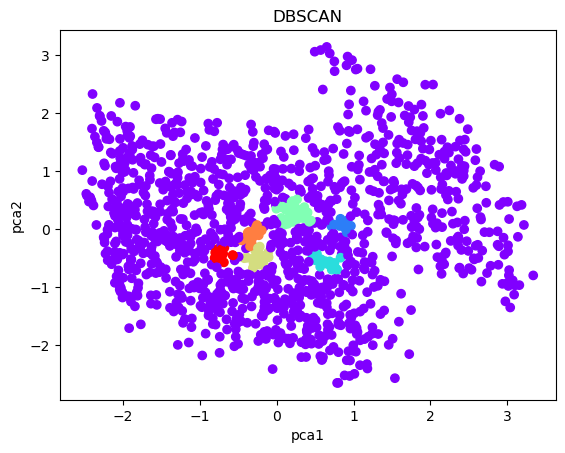

In [81]:
plt.scatter(transform_data2[:,0],transform_data2[:,1],c=labels,cmap='rainbow')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('DBSCAN')

In [85]:
Kmscore=silhouette_score(scale_df,model.labels_,metric='euclidean')
Hiscore=silhouette_score(scale_df,whc.labels_,metric='euclidean')
DBscore=silhouette_score(scale_df,db.labels_,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  0.19956219416589863
Hirachical :  0.17725818248289033
DBSCAN     :  -0.1850572080007773


In [86]:
Kmscore=silhouette_score(transform_data2,model.labels_,metric='euclidean')
Hiscore=silhouette_score(transform_data2,model.labels_,metric='euclidean')
DBscore=silhouette_score(transform_data2,labels,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  -0.005836697832817958
Hirachical :  -0.005836697832817958
DBSCAN     :  -0.4167013881921804


In [87]:
# Kmean best model